## Import libraries and data

In [1]:
import h5py
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras import initializers

In [2]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 3.1MB/s 


In [3]:
#Libraries for Hyperparameter tuning.
import kerastuner as kt
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [4]:
#Load file from google drive 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':'1a9q1XkVLRZ7wGQCO85oQepzrjl91frNj'}) 
downloaded.GetContentFile('Autonomous_Vehicles_SVHN_single_grey1.h5')  


In [6]:
#Reading the file content
SVHNfile = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')


In [7]:
#getting the data set keys in the file
list(SVHNfile.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [8]:
#Getting the data from respective keys
SVHN_df_Xtest = SVHNfile['X_test']
SVHN_df_X_train = SVHNfile['X_train']
SVHN_df_X_val = SVHNfile['X_val']
SVHN_df_y_test = SVHNfile['y_test']
SVHN_df_y_train = SVHNfile['y_train']
SVHN_df_y_val = SVHNfile['y_val']

In [9]:
#Cheking th shapes of data

print("X test shape: ",SVHN_df_Xtest.shape )
print("X Train shape: ", SVHN_df_X_train.shape)
print("X Val shape: ",SVHN_df_X_val.shape )



X test shape:  (18000, 32, 32)
X Train shape:  (42000, 32, 32)
X Val shape:  (60000, 32, 32)


## Data Visualisation

Label :  4
Image :


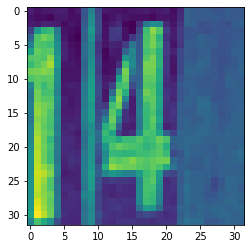

In [ ]:
#visualising some images in the data

print("Label : ",SVHN_df_y_train[200])
print("Image :")
plt.imshow(SVHN_df_X_train[200])

Label :  2
Image :


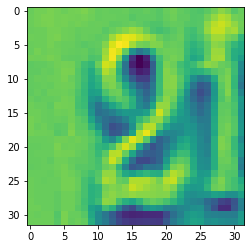

In [ ]:

print("Label : ",SVHN_df_y_test[17000])
print("Image :")
plt.imshow(SVHN_df_Xtest[17000])

Label :  7
Image :


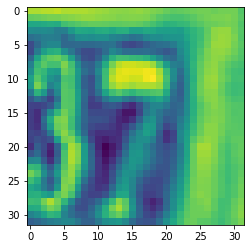

In [ ]:
print("Label : ",SVHN_df_y_val[30000])
print("Image :")
plt.imshow(SVHN_df_X_val[30000])

In [ ]:
SVHN_Xtest = SVHNfile.get('X_test')
SVHN_X_train = SVHNfile.get('X_train')
SVHN_X_val = SVHNfile.get('X_val')
SVHN_y_test = SVHNfile.get('y_test')
SVHN_y_train = SVHNfile.get('y_train')
SVHN_y_val = SVHNfile.get('y_val')

In [ ]:
type(SVHN_Xtest)

h5py._hl.dataset.Dataset

## Reshaping the datasets

In [ ]:
print("X test shape: ",SVHN_Xtest.shape )
print("X Train shape: ", SVHN_X_train.shape)
print("X Val shape: ",SVHN_X_val.shape )

X test shape:  (18000, 32, 32)
X Train shape:  (42000, 32, 32)
X Val shape:  (60000, 32, 32)


In [ ]:
#Converting to numpy array 
SVHN_Xtest_arr =np.array(SVHN_Xtest)
SVHN_X_train_arr = np.array(SVHN_X_train)
SVHN_X_val_arr = np.array(SVHN_X_val)


In [ ]:
#reshaping/Flattening  the data into respective dimensions
SVHN_Xtest_arr =SVHN_Xtest_arr.reshape(18000,1024)
SVHN_X_train_arr = SVHN_X_train_arr.reshape(42000,1024)
SVHN_X_val_arr = SVHN_X_val_arr.reshape(60000,1024)


In [ ]:
#Dimensions after reshaping

print("X test shape: ",SVHN_Xtest_arr.shape )
print("X Train shape: ", SVHN_X_train_arr.shape)
print("X Val shape: ",SVHN_X_val_arr.shape )

X test shape:  (18000, 1024)
X Train shape:  (42000, 1024)
X Val shape:  (60000, 1024)


In [ ]:
pd.value_counts(SVHN_df_y_train)

3    4281
5    4232
2    4197
9    4196
7    4192
8    4188
4    4188
0    4186
1    4172
6    4168
Name: /y_train, dtype: int64

## Data Normalization

In [ ]:
#Normalize the data
#Check the min and max for each data for normalization
print("X test min and max: ",(SVHN_Xtest_arr.min(),SVHN_Xtest_arr.max()) )
print("X Train min and max: ", (SVHN_X_train_arr.min(),SVHN_X_train_arr.max()))
print("X Val min and max: ",(SVHN_X_val_arr.min(),SVHN_X_val_arr.max()) )

X test min and max:  (0.0, 254.9745)
X Train min and max:  (0.0, 254.9745)
X Val min and max:  (0.0, 254.9745)


In [ ]:
SVHN_Xtest_arr = SVHN_Xtest_arr /254.9745
SVHN_X_train_arr = SVHN_X_train_arr /254.9745
SVHN_X_val_arr = SVHN_X_val_arr /254.9745

In [ ]:
print("X test min  and max : ",(SVHN_Xtest_arr.min(),SVHN_Xtest_arr.max()) )
print("X Train min  and max : ", (SVHN_X_train_arr.min(),SVHN_X_train_arr.max()))
print("X Val min  and max : ",(SVHN_X_val_arr.min(),SVHN_X_val_arr.max()) )

X test min  and max :  (0.0, 1.0)
X Train min  and max :  (0.0, 1.0)
X Val min  and max :  (0.0, 1.0)


## One hot coding the target column
###### This is required when we use cross entropy loss function along with softmax

In [ ]:
SVHN_y_test = to_categorical(SVHN_y_test,num_classes=10)
SVHN_y_train = to_categorical(SVHN_y_train,num_classes=10)
SVHN_y_val = to_categorical(SVHN_y_val,num_classes=10)

In [ ]:
SVHN_y_test[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
SVHN_y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
SVHN_y_val[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Create Neural Network model

In [ ]:
def build_SVHN_train_classifier(inLearningRate,inEpochs,lambdaVal,X,Y):
  #weight_init=initializers.HeNormal()
 # weight_init=initializers.GlorotNormal()
  #weight_init=initializers.HeUniform()
  weight_init=initializers.GlorotUniform()
  
  dropOut=0.6
  modelNNtrain= Sequential()
  #modelNN.add(Input(shape=(1024,)))
  modelNNtrain.add(BatchNormalization())
  modelNNtrain.add(Dense(256,activation='relu',input_shape=(1024,),kernel_initializer=weight_init))
  modelNNtrain.add(BatchNormalization())
  modelNNtrain.add(Dropout(dropOut))

  
  modelNNtrain.add(Dense(128,activation='relu',kernel_initializer=weight_init))
  modelNNtrain.add(BatchNormalization())
  modelNNtrain.add(Dropout(dropOut))
  
  modelNNtrain.add(Dense(64,activation='relu',kernel_initializer=weight_init))
  modelNNtrain.add(BatchNormalization())
  modelNNtrain.add(Dropout(dropOut))
  
  #modelNN.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform'))
 # modelNN.add(Dropout(dropOut))
  #modelNN.add(BatchNormalization())
 # modelNN.add(Dense(64,activation='relu',kernel_initializer=weight_init))
 # modelNN.add(Dropout(dropOut))
 # modelNN.add(BatchNormalization())
  modelNNtrain.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.L2(lambdaVal)))
  
  sgd = optimizers.SGD(learning_rate=inLearningRate,decay =(inLearningRate/inEpochs), momentum=0.9)
  modelNNtrain.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  modelNNtrain.fit(X, Y, epochs=inEpochs,batch_size=10000, verbose= 1)
 # print(history.history.keys())
 
  return modelNNtrain

#### We will check for random range of values for learning rate and lambda and check the accuracies

In [ ]:
#1.Small values : LR =1e-7,lambda= 1e-7
model_lr= build_SVHN_train_classifier(1e-7,100,1e-07,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/100
5/5 [==============================] - 4s 413ms/step - loss: 3.7959 - accuracy: 0.0998
Epoch 2/100
5/5 [==============================] - 2s 408ms/step - loss: 3.7708 - accuracy: 0.1013
Epoch 3/100
5/5 [==============================] - 2s 404ms/step - loss: 3.7582 - accuracy: 0.1014
Epoch 4/100
5/5 [==============================] - 2s 408ms/step - loss: 3.7644 - accuracy: 0.1009
Epoch 5/100
5/5 [==============================] - 2s 403ms/step - loss: 3.7942 - accuracy: 0.0957
Epoch 6/100
5/5 [==============================] - 2s 406ms/step - loss: 3.7674 - accuracy: 0.1009
Epoch 7/100
5/5 [==============================] - 2s 406ms/step - loss: 3.7793 - accuracy: 0.0979
Epoch 8/100
5/5 [==============================] - 2s 405ms/step - loss: 3.7680 - accuracy: 0.1011
Epoch 9/100
5/5 [==============================] - 2s 412ms/step - loss: 3.7704 - accuracy: 0.1015
Epoch 10/100
5/5 [==============================] - 2s 403ms/step - loss: 3.7836 - accuracy: 0.0982
Epoch 11/

##### The accuracy measured is not that much .Also loss is reducing minimally. Hence we have vanishing gradient problem here.

In [ ]:
#2.Large values: LR =1e1,lambda= 1e1
model_lr= build_SVHN_train_classifier(1e1,100,1e1,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/100
5/5 [==============================] - 3s 408ms/step - loss: 2188014873117614336.0000 - accuracy: 0.1004
Epoch 2/100
5/5 [==============================] - 2s 405ms/step - loss: nan - accuracy: 0.0990
Epoch 3/100
5/5 [==============================] - 2s 404ms/step - loss: nan - accuracy: 0.0994
Epoch 4/100
5/5 [==============================] - 2s 409ms/step - loss: nan - accuracy: 0.1003
Epoch 5/100
5/5 [==============================] - 2s 408ms/step - loss: nan - accuracy: 0.0995
Epoch 6/100
5/5 [==============================] - 2s 404ms/step - loss: nan - accuracy: 0.1003
Epoch 7/100
5/5 [==============================] - 2s 406ms/step - loss: nan - accuracy: 0.0998
Epoch 8/100
5/5 [==============================] - 2s 404ms/step - loss: nan - accuracy: 0.1005
Epoch 9/100
5/5 [==============================] - 2s 413ms/step - loss: nan - accuracy: 0.0998
Epoch 10/100
5/5 [==============================] - 2s 403ms/step - loss: nan - accuracy: 0.0992
Epoch 11/100
5/5 [

##### Here the loss is a large number and misses the global minima. Hence we have exploding gradient problem here.

In [ ]:
#3. Mid Range value : LR =1e-4,lambda= 1e-5
model_lr= build_SVHN_train_classifier(1e-4,100,1e-5,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/100
5/5 [==============================] - 3s 412ms/step - loss: 3.6803 - accuracy: 0.0978
Epoch 2/100
5/5 [==============================] - 2s 409ms/step - loss: 3.7045 - accuracy: 0.0985
Epoch 3/100
5/5 [==============================] - 2s 414ms/step - loss: 3.6910 - accuracy: 0.1015
Epoch 4/100
5/5 [==============================] - 2s 408ms/step - loss: 3.6864 - accuracy: 0.0979
Epoch 5/100
5/5 [==============================] - 2s 407ms/step - loss: 3.6812 - accuracy: 0.1006
Epoch 6/100
5/5 [==============================] - 2s 403ms/step - loss: 3.6947 - accuracy: 0.1014
Epoch 7/100
5/5 [==============================] - 2s 410ms/step - loss: 3.6790 - accuracy: 0.1022
Epoch 8/100
5/5 [==============================] - 2s 405ms/step - loss: 3.6698 - accuracy: 0.1005
Epoch 9/100
5/5 [==============================] - 2s 411ms/step - loss: 3.6588 - accuracy: 0.0989
Epoch 10/100
5/5 [==============================] - 2s 406ms/step - loss: 3.6728 - accuracy: 0.1000
Epoch 11/

In [ ]:
model_lr.evaluate(SVHN_Xtest_arr,SVHN_y_test)

563/563 [==============================] - 1s 2ms/step - loss: 2.3608 - accuracy: 0.1269


[2.3608453273773193, 0.12688888609409332]

##### Accuracy is not much in the above set of values.

In [ ]:
#4. Another set: LR =1e-3,lambda= 1e-4
model_lr= build_SVHN_train_classifier(1e-3,100,1e-4,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/100
5/5 [==============================] - 3s 408ms/step - loss: 3.8060 - accuracy: 0.0986
Epoch 2/100
5/5 [==============================] - 2s 407ms/step - loss: 3.7874 - accuracy: 0.1001
Epoch 3/100
5/5 [==============================] - 2s 401ms/step - loss: 3.7691 - accuracy: 0.1020
Epoch 4/100
5/5 [==============================] - 2s 406ms/step - loss: 3.7195 - accuracy: 0.1016
Epoch 5/100
5/5 [==============================] - 2s 399ms/step - loss: 3.7223 - accuracy: 0.1020
Epoch 6/100
5/5 [==============================] - 2s 407ms/step - loss: 3.6782 - accuracy: 0.1033
Epoch 7/100
5/5 [==============================] - 2s 400ms/step - loss: 3.6439 - accuracy: 0.1028
Epoch 8/100
5/5 [==============================] - 2s 406ms/step - loss: 3.6098 - accuracy: 0.1049
Epoch 9/100
5/5 [==============================] - 2s 406ms/step - loss: 3.5780 - accuracy: 0.1037
Epoch 10/100
5/5 [==============================] - 2s 406ms/step - loss: 3.5343 - accuracy: 0.1055
Epoch 11/

In [ ]:
model_lr.evaluate(SVHN_Xtest_arr,SVHN_y_test)

563/563 [==============================] - 1s 2ms/step - loss: 2.1748 - accuracy: 0.2876


[2.1748228073120117, 0.28761109709739685]

###### Still not much improvement in accuracy

In [ ]:
#5. LR =1e-2,lambda= 1e-3
model_lr= build_SVHN_train_classifier(1e-2,100,1e-3,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/100
5/5 [==============================] - 4s 405ms/step - loss: 3.7340 - accuracy: 0.1010
Epoch 2/100
5/5 [==============================] - 2s 407ms/step - loss: 3.6059 - accuracy: 0.1027
Epoch 3/100
5/5 [==============================] - 2s 403ms/step - loss: 3.4345 - accuracy: 0.1026
Epoch 4/100
5/5 [==============================] - 2s 408ms/step - loss: 3.2613 - accuracy: 0.1057
Epoch 5/100
5/5 [==============================] - 2s 404ms/step - loss: 3.1000 - accuracy: 0.1055
Epoch 6/100
5/5 [==============================] - 2s 404ms/step - loss: 2.9641 - accuracy: 0.1081
Epoch 7/100
5/5 [==============================] - 2s 400ms/step - loss: 2.8408 - accuracy: 0.1130
Epoch 8/100
5/5 [==============================] - 2s 405ms/step - loss: 2.7427 - accuracy: 0.1139
Epoch 9/100
5/5 [==============================] - 2s 402ms/step - loss: 2.6623 - accuracy: 0.1157
Epoch 10/100
5/5 [==============================] - 2s 405ms/step - loss: 2.5999 - accuracy: 0.1151
Epoch 11/

In [ ]:
model_lr.evaluate(SVHN_Xtest_arr,SVHN_y_test)

563/563 [==============================] - 1s 2ms/step - loss: 1.4787 - accuracy: 0.5684


[1.4786970615386963, 0.5683888792991638]

##### Better performance. We can increase the epcohs to enhance it further.

In [ ]:
model_lr= build_SVHN_train_classifier(1e-2,300,1e-3,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/300
5/5 [==============================] - 3s 404ms/step - loss: 3.7194 - accuracy: 0.0971
Epoch 2/300
5/5 [==============================] - 2s 411ms/step - loss: 3.5735 - accuracy: 0.1019
Epoch 3/300
5/5 [==============================] - 2s 407ms/step - loss: 3.4196 - accuracy: 0.1020
Epoch 4/300
5/5 [==============================] - 2s 401ms/step - loss: 3.2355 - accuracy: 0.1050
Epoch 5/300
5/5 [==============================] - 2s 409ms/step - loss: 3.0656 - accuracy: 0.1075
Epoch 6/300
5/5 [==============================] - 2s 403ms/step - loss: 2.9372 - accuracy: 0.1092
Epoch 7/300
5/5 [==============================] - 2s 408ms/step - loss: 2.8192 - accuracy: 0.1117
Epoch 8/300
5/5 [==============================] - 2s 406ms/step - loss: 2.7316 - accuracy: 0.1115
Epoch 9/300
5/5 [==============================] - 2s 406ms/step - loss: 2.6567 - accuracy: 0.1136
Epoch 10/300
5/5 [==============================] - 2s 407ms/step - loss: 2.5914 - accuracy: 0.1161
Epoch 11/

In [ ]:
model_lr.evaluate(SVHN_Xtest_arr,SVHN_y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.9045 - accuracy: 0.7372


[0.9044808745384216, 0.7371666431427002]

## Model training and tuning

#### We will use Randomsearch hyperparameter search techique to find out the best set of parameters for maximum accuracy.

In [ ]:
#Define the base neural network model 
def build_NNmodel(hp):  
  model = Sequential([
    
    Dense(
        units=hp.Int('Dense1', min_value=64, max_value=256, step=16),
        activation='relu',
        input_shape =(1024,),
        kernel_initializer =hp.Choice('wt_initialiser', values=['glorot_uniform','glorot_normal','he_uniform','he_normal'])
    ),
      BatchNormalization(),
      Dropout(rate=(hp.Choice('dropOutRate',values=[0.5,0.6,0.7]))),
     Dense(
        units=hp.Int('Dense2', min_value=32, max_value=128, step=16),
        activation='relu'
        ),

    Dense(10, activation='softmax',kernel_regularizer=regularizers.L2(hp.Choice('regulariser', values=[1E-2, 1E-3, 1E-4, 1E-5])))
  ])
  
  model.compile(optimizer=optimizers.SGD(hp.Choice('learning_rate', values=[ 1E-2, 1E-3, 1E-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
  
  tuner_search=RandomSearch(build_NNmodel,objective='accuracy',max_trials=5,directory='output19',project_name="SVHN")

In [ ]:
tuner_search.search(SVHN_X_train_arr, SVHN_y_train,epochs=100)

Trial 6 Complete [00h 04m 25s]
accuracy: 0.655738115310669

Best accuracy So Far: 0.6870952248573303
Total elapsed time: 02h 15m 58s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_search.results_summary()

Results summary
Results in output19/SVHN
Showing 10 best trials
Objective(name='accuracy', direction='max')
Trial summary
Hyperparameters:
Dense1: 160
wt_initialiser: glorot_uniform
dropOutRate: 0.6
Dense2: 48
regulariser: 0.0001
learning_rate: 0.001
Score: 0.6870952248573303
Trial summary
Hyperparameters:
Dense1: 96
wt_initialiser: he_uniform
dropOutRate: 0.6
Dense2: 48
regulariser: 1e-05
learning_rate: 0.001
Score: 0.655738115310669
Trial summary
Hyperparameters:
Dense1: 176
wt_initialiser: glorot_uniform
dropOutRate: 0.6
Dense2: 48
regulariser: 0.01
learning_rate: 0.01
Score: 0.6367619037628174
Trial summary
Hyperparameters:
Dense1: 208
wt_initialiser: glorot_uniform
dropOutRate: 0.5
Dense2: 64
regulariser: 0.01
learning_rate: 0.0001
Score: 0.5470238327980042
Trial summary
Hyperparameters:
Dense1: 64
wt_initialiser: glorot_uniform
dropOutRate: 0.7
Dense2: 96
regulariser: 0.001
learning_rate: 0.01
Score: 0.3786190450191498


#### After several rounds of hyper parameter tuning, following were the best set of parameters that gave maximum accuracy
##### Learning rate=0.01
##### Lambda =1e-05
##### Number of neurons = 144
##### weight initialiser = Glorot Uniform

In [ ]:
history=[]
def build_SVHN_classifier(inLearningRate,inEpochs,lambdaVal,X,Y):
  #weight_init=initializers.HeNormal()
 # weight_init=initializers.GlorotNormal()
  #weight_init=initializers.HeUniform()
  weight_init=initializers.GlorotUniform()
  loss=[]
  accuracy=[]
  dropOut=0.6
  modelNN= Sequential()
  #modelNN.add(Input(shape=(1024,)))
  modelNN.add(BatchNormalization())
  modelNN.add(Dense(144,activation='relu',input_shape=(1024,),kernel_initializer=weight_init))
  modelNN.add(BatchNormalization())
  modelNN.add(Dropout(dropOut))

  
  #modelNN.add(Dense(80,activation='relu',kernel_initializer=weight_init))
  # modelNN.add(BatchNormalization())
  #modelNN.add(Dropout(dropOut))
  
  #modelNN.add(Dense(64,activation='relu',kernel_initializer=weight_init))
  #modelNN.add(BatchNormalization())
  #modelNN.add(Dropout(dropOut))
  
  #modelNN.add(Dense(64,activation='relu',kernel_initializer='glorot_uniform'))
 # modelNN.add(Dropout(dropOut))
  #modelNN.add(BatchNormalization())
 # modelNN.add(Dense(64,activation='relu',kernel_initializer=weight_init))
 # modelNN.add(Dropout(dropOut))
 # modelNN.add(BatchNormalization())
  modelNN.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.L2(lambdaVal)))
  
  sgd = optimizers.SGD(learning_rate=inLearningRate,decay =(inLearningRate/inEpochs), momentum=0.9)
  modelNN.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history =modelNN.fit(X, Y, epochs=inEpochs,validation_data=(SVHN_X_val_arr,SVHN_y_val),batch_size=10000, verbose= 1)
 # print(history.history.keys())
 
  return modelNN,history

In [ ]:
model,history = build_SVHN_classifier(0.01,200,1e-05,SVHN_X_train_arr,SVHN_y_train)

Epoch 1/200
5/5 [==============================] - 3s 431ms/step - loss: 3.7149 - accuracy: 0.0969 - val_loss: 2.3480 - val_accuracy: 0.1044
Epoch 2/200
5/5 [==============================] - 2s 380ms/step - loss: 3.3603 - accuracy: 0.1111 - val_loss: 2.3329 - val_accuracy: 0.1031
Epoch 3/200
5/5 [==============================] - 2s 376ms/step - loss: 3.0872 - accuracy: 0.1296 - val_loss: 2.3129 - val_accuracy: 0.1144
Epoch 4/200
5/5 [==============================] - 2s 376ms/step - loss: 2.9033 - accuracy: 0.1437 - val_loss: 2.3015 - val_accuracy: 0.1409
Epoch 5/200
5/5 [==============================] - 2s 374ms/step - loss: 2.7336 - accuracy: 0.1621 - val_loss: 2.2810 - val_accuracy: 0.1477
Epoch 6/200
5/5 [==============================] - 2s 379ms/step - loss: 2.6067 - accuracy: 0.1767 - val_loss: 2.2602 - val_accuracy: 0.1786
Epoch 7/200
5/5 [==============================] - 2s 374ms/step - loss: 2.4961 - accuracy: 0.1970 - val_loss: 2.2365 - val_accuracy: 0.2373
Epoch 8/200
5

In [ ]:
#Print out the accuracies
print ("Training set accuracy for the model :",model.evaluate(SVHN_X_train_arr, SVHN_y_train)[1])
print ("Validation set accuracy for the model :",model.evaluate(SVHN_X_val_arr,SVHN_y_val)[1])
print ("Test set accuracy for the model :",model.evaluate(SVHN_Xtest_arr,SVHN_y_test)[1])


1313/1313 [==============================] - 2s 2ms/step - loss: 0.7090 - accuracy: 0.8209
Training set accuracy for the model : 0.8209047913551331
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7260 - accuracy: 0.8147
Validation set accuracy for the model : 0.814716637134552
563/563 [==============================] - 1s 2ms/step - loss: 0.7656 - accuracy: 0.8003
Test set accuracy for the model : 0.8002777695655823


In [ ]:
#Predict using the above model
predict = np.argmax(model.predict(SVHN_Xtest_arr), axis=-1)


Label for index 17500 is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]:
Predicted value for for index 17500 is 5:


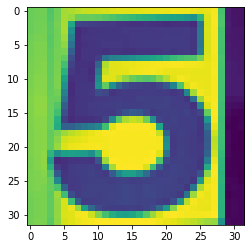

Label for index 17501 is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]:
Predicted value for for index 17501 is 8:


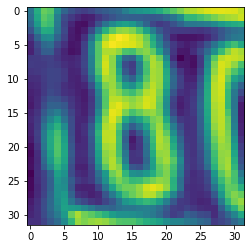

Label for index 17502 is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]:
Predicted value for for index 17502 is 8:


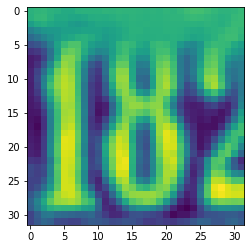

Label for index 17503 is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]:
Predicted value for for index 17503 is 8:


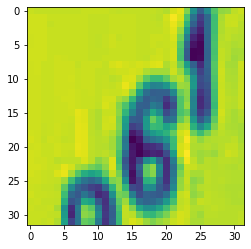

Label for index 17504 is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]:
Predicted value for for index 17504 is 1:


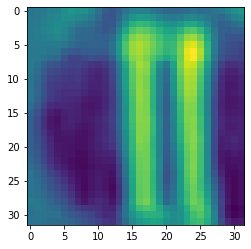

Label for index 17505 is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]:
Predicted value for for index 17505 is 0:


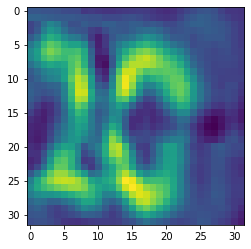

Label for index 17506 is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]:
Predicted value for for index 17506 is 0:


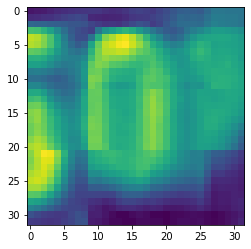

Label for index 17507 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]:
Predicted value for for index 17507 is 9:


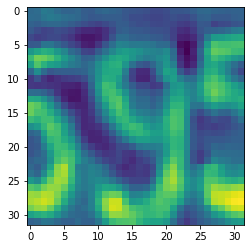

Label for index 17508 is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]:
Predicted value for for index 17508 is 1:


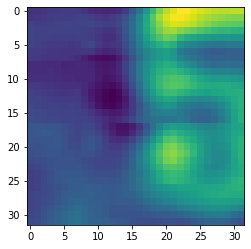

Label for index 17509 is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]:
Predicted value for for index 17509 is 6:


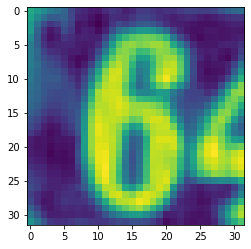

In [ ]:
#Let us check some random  rows to compare the predicted value and actual value
for values in range(17500,17510):
  print("Label for index {} is {}:".format(values,SVHN_y_test[values]))
  print("Predicted value for for index {} is {}:".format(values,predict[values]))
  
  plt.imshow(SVHN_Xtest_arr[values].reshape(32,32))
  plt.show()
  

##### Out of 10 predictions, 8 were correct in the above range of test rows.

### Plot training loss, validation loss v/s epochs

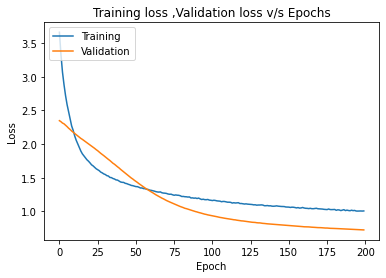

In [ ]:
#"history" object stores the keys and values from results of model fitting i.e val_loss, train loss, val_accuracy,training accuracy. We can use this to extract the keys and plot it
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss ,Validation loss v/s Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

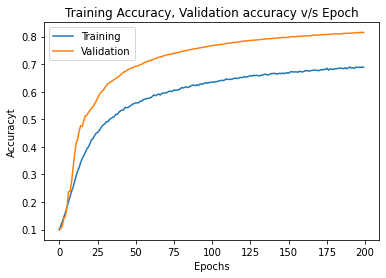

In [ ]:
 #Training Accuracy , Validation accuracy v/s Epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy, Validation accuracy v/s Epoch')
plt.ylabel('Accuracyt')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

### Observations:
1. From the two plots above , we can observe that:
  
*   For training and validation loss, with each epoch the loss is gradually decreasing.Validation loss is comparatively lesser than training loss. 
*  Similarly for training and validation accuracy, accuracy increases gradually with each epoch. Validation accuracy is higher than training accuracy. 
*  Hence a model learns more with training data and thus is able to perform better on validation set of data.

2.  For a neural network to provide best accuracy, following hyperparameters are required to be tuned correctly:


      * Weight initialization
      * Learning rate
      * Number of layers
      * Number of neurons in a layer
      * DropOut Rate

If learning rate is too high then we face exploding gradient problem where the gradient makes large jump back and forth missing the global minima

If learning rate is too low, then we face vanishing gradient problem where the gradient moves too slowly towards the global minima thus taking more time for training.

3. For our neural network model, we have an accuracy of :


    *  82.09 % for training set
    *  81.47 % for validation set
    *  80.03 % for test set













